<a href="https://colab.research.google.com/github/murakami-tatsumi/colab/blob/master/mnist_keras_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNISTをtensorflow+kerasで学習し手書き入力を認識させる

In [0]:
#
# 1. 学習
#

# coding: utf-8
import os
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 検証用に保存
x_test_x = x_test

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print ('K.image_data_format() = ', K.image_data_format())

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Saving model file
#if not os.path.isdir( "model" ):
#    os.makedirs( "model" )
#model.save('model/mnist-cnn.h5')
model.summary()
print ('完了！')    

Using TensorFlow backend.
W0815 03:01:07.187769 139792048658304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 03:01:07.199411 139792048658304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 03:01:07.203274 139792048658304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0815 03:01:07.229175 139792048658304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0815 03:01:07.231305 1397920

K.image_data_format() =  channels_last
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


W0815 03:01:07.240345 139792048658304 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0815 03:01:07.306435 139792048658304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0815 03:01:07.313629 139792048658304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0815 03:01:07.397450 139792048658304 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wr

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 135us/step - loss: 0.2631 - acc: 0.9186 - val_loss: 0.0665 - val_acc: 0.9792
Epoch 2/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0878 - acc: 0.9740 - val_loss: 0.0448 - val_acc: 0.9848
Epoch 3/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0666 - acc: 0.9800 - val_loss: 0.0337 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0551 - acc: 0.9830 - val_loss: 0.0297 - val_acc: 0.9898
Epoch 5/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0483 - acc: 0.9858 - val_loss: 0.0302 - val_acc: 0.9900
Epoch 6/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0426 - acc: 0.9871 - val_loss: 0.0277 - val_acc: 0.9898
Epoch 7/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0366 - acc: 0.9885 - val_loss: 0.0262 - val_ac

予測＝ 4


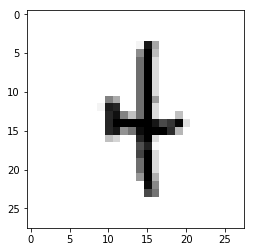

In [0]:
#
# 2. 前で保存した10000件の手書きデータからランダムに1件抽出し検証する
#

d_idx = np.random.randint(10000)
print('予測＝',np.argmax(model.predict(x_test[d_idx].reshape(1,28,28,1))))
plt.imshow(x_test_x[d_idx], cmap =plt.cm.gray_r)

In [0]:
from google.colab import drive
drive.mount('/content/drive')